In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import yaml
import json


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
%pip install ultralytics -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ultralytics import YOLO
import os
import torch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# Функция для подготовки конфигурационного файла данных
def prepare_data_config(data_yaml_path='coco128.yaml'):
    # Проверьте, существует ли файл конфигурации
    if not os.path.exists(data_yaml_path):
        raise FileNotFoundError(f"{data_yaml_path} не найден.")
    
    print("Конфигурация данных загружена и проверена.")

# Функция для запуска обучения
def train_yolov8():
    # Создайте объект модели YOLOv8
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = YOLO('/kaggle/input/yolo/pytorch/default/1/v11_augment_300.pt').to(device)  # Загрузите предобученные веса

    # Запустите процесс обучения
    model.train(data='/kaggle/input/animalsquality/data.yaml', epochs=100, imgsz=640, save=True)


prepare_data_config('/kaggle/input/animalsquality/data.yaml')

# Запуск обучения
train_yolov8()

print("Обучение завершено.")

Конфигурация данных загружена и проверена.


100%|██████████| 49.0M/49.0M [00:00<00:00, 130MB/s] 


engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=/kaggle/input/animalsquality/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=F

100%|██████████| 755k/755k [00:00<00:00, 23.7MB/s]
2024-11-09 15:28:23,963	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-11-09 15:28:24,545	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  2    173824  ultralytics.nn.modules.block.C3k2            [128, 256, 2, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  2    691712  ultralytics.nn.modules.block.C3k2            [256, 512, 2, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  2   2234368  ultralytics.nn.modules.block.C3k2            [512, 512, 2, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 91.3MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/animalsquality/train/labels... 2818 images, 1490 backgrounds, 0 corrupt: 100%|██████████| 2818/2818 [00:07<00:00, 364.76it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/animalsquality/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/animalsquality/valid/labels... 672 images, 357 backgrounds, 0 corrupt: 100%|██████████| 672/672 [00:01<00:00, 383.97it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/animalsquality/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      11.3G      1.657      2.805      1.964          4        640: 100%|██████████| 177/177 [02:06<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:12<00:00,  1.62it/s]

                   all        672        412     0.0521      0.121       0.02    0.00448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      11.2G      2.083      2.826       2.39          4        640: 100%|██████████| 177/177 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.79it/s]

                   all        672        412      0.159      0.127     0.0707     0.0219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      11.2G      1.976      2.698      2.307          1        640: 100%|██████████| 177/177 [02:07<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.79it/s]

                   all        672        412      0.215      0.194      0.128     0.0413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      11.3G      1.895      2.548      2.224          2        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.79it/s]

                   all        672        412      0.449      0.256      0.207     0.0793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      11.3G      1.826      2.407      2.172          3        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.80it/s]

                   all        672        412      0.754      0.254      0.284      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      11.3G      1.775      2.253      2.105          3        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.79it/s]

                   all        672        412       0.35      0.377      0.309      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      11.2G      1.634      2.062      2.002          0        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.80it/s]

                   all        672        412      0.837      0.302      0.393      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      11.3G      1.602      2.016      1.969          2        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.82it/s]

                   all        672        412      0.276      0.484      0.375      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      11.3G      1.575      1.936       1.93          4        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.81it/s]

                   all        672        412      0.612      0.434      0.477      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      11.3G      1.525      1.901      1.915          1        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.82it/s]

                   all        672        412      0.505      0.533      0.511      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      11.2G      1.485      1.801      1.851          0        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.81it/s]

                   all        672        412      0.474      0.559       0.53      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      11.3G      1.452      1.746      1.821          1        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.81it/s]

                   all        672        412      0.445      0.479      0.469      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      11.3G      1.407       1.73      1.786          0        640: 100%|██████████| 177/177 [02:05<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.81it/s]

                   all        672        412      0.534      0.526       0.54      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      11.3G      1.421      1.667      1.783          0        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.82it/s]

                   all        672        412      0.483       0.61      0.552       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      11.2G      1.407      1.681       1.79          3        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.82it/s]

                   all        672        412      0.472      0.606      0.556      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      11.3G      1.381      1.605      1.758          3        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.82it/s]

                   all        672        412      0.592      0.523      0.545      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      11.3G      1.328      1.567      1.732          4        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.81it/s]

                   all        672        412      0.646      0.555        0.6      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      11.3G      1.337       1.52      1.733          4        640: 100%|██████████| 177/177 [02:05<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.82it/s]

                   all        672        412      0.601      0.546      0.566      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      11.2G      1.289      1.471      1.674          1        640: 100%|██████████| 177/177 [02:05<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.82it/s]

                   all        672        412      0.673      0.607      0.679      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      11.3G      1.279      1.486      1.691          3        640: 100%|██████████| 177/177 [02:05<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.81it/s]

                   all        672        412      0.637      0.605      0.657      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      11.3G      1.254      1.426      1.651          1        640: 100%|██████████| 177/177 [02:05<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.81it/s]

                   all        672        412      0.632       0.64      0.669      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      11.2G      1.277      1.455      1.668          2        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.82it/s]

                   all        672        412      0.618      0.656      0.677      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      11.2G      1.234      1.411      1.619          0        640: 100%|██████████| 177/177 [02:05<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.81it/s]

                   all        672        412      0.715      0.613      0.693      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      11.3G      1.194      1.339      1.604          5        640: 100%|██████████| 177/177 [02:05<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.83it/s]

                   all        672        412      0.612       0.68      0.674      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      11.3G      1.199      1.357      1.608          2        640: 100%|██████████| 177/177 [02:05<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.81it/s]

                   all        672        412      0.676      0.597      0.658      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      11.3G      1.193      1.349      1.592          2        640: 100%|██████████| 177/177 [02:05<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.81it/s]

                   all        672        412      0.603      0.657      0.668      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      11.2G      1.155       1.31      1.578          2        640: 100%|██████████| 177/177 [02:05<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.82it/s]

                   all        672        412      0.802      0.616      0.736      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      11.3G       1.19      1.313      1.603          6        640: 100%|██████████| 177/177 [02:05<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.82it/s]

                   all        672        412      0.618      0.648      0.647        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      11.3G       1.15      1.294      1.573          1        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.81it/s]

                   all        672        412      0.683      0.656      0.701      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      11.2G      1.136      1.271      1.556          3        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.81it/s]

                   all        672        412      0.733      0.603       0.69      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      11.2G      1.147      1.251      1.565          0        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.82it/s]

                   all        672        412      0.772      0.669      0.765      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      11.3G      1.133      1.242      1.542          2        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.82it/s]

                   all        672        412      0.756      0.675       0.76      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      11.2G      1.106       1.25      1.536          1        640: 100%|██████████| 177/177 [02:05<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.82it/s]

                   all        672        412      0.814       0.64      0.742      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      11.3G      1.086      1.188      1.519          0        640: 100%|██████████| 177/177 [02:05<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.83it/s]

                   all        672        412      0.751       0.69      0.773       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      11.2G      1.099      1.177      1.523          1        640: 100%|██████████| 177/177 [02:05<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.82it/s]

                   all        672        412      0.763      0.654      0.744      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      11.3G      1.055      1.138      1.487          2        640: 100%|██████████| 177/177 [02:05<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.81it/s]

                   all        672        412      0.761      0.697      0.777      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      11.3G      1.048      1.132      1.477          4        640: 100%|██████████| 177/177 [02:05<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.83it/s]

                   all        672        412      0.768      0.733      0.786      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      11.3G      1.049      1.104      1.484          1        640: 100%|██████████| 177/177 [02:05<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.82it/s]

                   all        672        412      0.784      0.696      0.782      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      11.2G      1.034      1.094      1.461          0        640: 100%|██████████| 177/177 [02:05<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.83it/s]

                   all        672        412      0.773        0.7      0.784      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      11.3G      1.044      1.155      1.499          1        640: 100%|██████████| 177/177 [02:05<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.83it/s]

                   all        672        412       0.84      0.706      0.809      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      11.3G      1.002      1.092      1.452          0        640: 100%|██████████| 177/177 [02:05<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.83it/s]

                   all        672        412      0.867      0.677      0.798      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      11.2G      1.028      1.097      1.467          3        640: 100%|██████████| 177/177 [02:05<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.82it/s]

                   all        672        412      0.807      0.712      0.806       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      11.2G       1.05      1.117      1.479          0        640: 100%|██████████| 177/177 [02:05<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.771      0.744      0.807       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      11.3G      1.007      1.077      1.449          2        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.83it/s]

                   all        672        412      0.794      0.709      0.803      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      11.3G      1.001      1.067      1.461          1        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.82it/s]

                   all        672        412      0.801      0.773      0.835      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      11.2G     0.9708      1.023      1.419          2        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.83it/s]

                   all        672        412      0.798      0.714      0.794      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      11.2G     0.9811      1.022      1.414          4        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.81it/s]

                   all        672        412      0.833      0.689      0.798      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      11.3G     0.9663      1.008      1.416          5        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.83it/s]

                   all        672        412        0.8      0.737      0.816      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      11.2G     0.9487      0.996      1.402          0        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.83it/s]

                   all        672        412      0.752        0.8       0.84      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      11.3G     0.9726      1.024      1.423          6        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.83it/s]

                   all        672        412      0.813      0.746      0.829      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      11.2G     0.9399     0.9857      1.398          5        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.83it/s]

                   all        672        412      0.859      0.757      0.835      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      11.3G     0.9511     0.9611      1.388          1        640: 100%|██████████| 177/177 [02:05<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.782      0.789      0.827      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      11.3G     0.9334     0.9727      1.388          3        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.83it/s]

                   all        672        412      0.797      0.771       0.83      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      11.3G     0.9506     0.9582      1.401          3        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.804      0.787       0.85      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      11.2G     0.9183     0.9835      1.377          3        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.83it/s]

                   all        672        412      0.735      0.766      0.804      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      11.3G     0.9017     0.9313      1.362          3        640: 100%|██████████| 177/177 [02:05<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.83it/s]

                   all        672        412      0.827      0.783      0.847      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      11.3G     0.9075      0.931      1.353          1        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.835      0.759      0.837      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      11.3G     0.8936     0.9214      1.362          0        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.809      0.792      0.849      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      11.2G     0.8901     0.9154      1.353          2        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.85it/s]

                   all        672        412      0.762      0.784      0.829      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      11.3G     0.8909     0.8773      1.341          0        640: 100%|██████████| 177/177 [02:05<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.83it/s]

                   all        672        412      0.829      0.767      0.847      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      11.2G     0.8955      0.935      1.366          2        640: 100%|██████████| 177/177 [02:05<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.83it/s]

                   all        672        412      0.823      0.776      0.855      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      11.3G     0.8834     0.9158      1.342          4        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.816      0.775      0.854      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      11.2G     0.8644     0.8874      1.349          1        640: 100%|██████████| 177/177 [02:05<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.826      0.794      0.858      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      11.3G     0.8542     0.8596       1.32          3        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.799      0.797      0.856      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      11.3G     0.8393     0.8624      1.311          1        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.799      0.786      0.853      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      11.3G     0.8439     0.8589      1.323          2        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.83it/s]

                   all        672        412      0.807      0.777      0.847      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      11.2G      0.851      0.847      1.309          4        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.845      0.778       0.86      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      11.3G     0.8347     0.8334      1.305          2        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.797      0.815      0.875      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      11.3G     0.8136     0.8283      1.288          2        640: 100%|██████████| 177/177 [02:05<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.85it/s]

                   all        672        412      0.804      0.781      0.861      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      11.3G     0.8088     0.8223        1.3          3        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.818      0.819       0.88      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      11.2G      0.818     0.7967      1.289          2        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.824      0.811      0.877      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      11.3G     0.7953     0.7978      1.271          3        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.841      0.786      0.876      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      11.3G     0.8039     0.8172      1.294          2        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.773      0.861      0.876       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      11.2G     0.7841     0.7831      1.271          1        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.842      0.828      0.886       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      11.2G     0.7872     0.7897      1.274          3        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.835      0.796      0.878      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      11.3G     0.8089     0.8146      1.312          1        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.819      0.832      0.875      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      11.3G     0.7646     0.7485      1.245          1        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412        0.8      0.846      0.873      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      11.3G     0.7525       0.76      1.245          0        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.807       0.83      0.866      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      11.2G     0.7474     0.7636      1.246          1        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.867      0.794      0.876      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      11.3G     0.7347      0.733       1.23          2        640: 100%|██████████| 177/177 [02:05<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.85it/s]

                   all        672        412      0.798      0.815      0.867      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      11.3G     0.7686     0.7412      1.249          2        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.838      0.792      0.866      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      11.2G     0.7419     0.7476      1.238          1        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.856      0.796      0.878      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      11.2G     0.7333     0.7314      1.236          2        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.778      0.855      0.874       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      11.3G      0.726     0.7273      1.224          1        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412       0.79      0.848      0.878      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      11.3G     0.7183     0.7123      1.226          1        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.85it/s]

                   all        672        412      0.845       0.83      0.891      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      11.2G     0.7074      0.705      1.232          1        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.778      0.868      0.891      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      11.2G     0.7306      0.703      1.228          2        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.873      0.821      0.895      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      11.3G     0.6989     0.6759      1.203          3        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.825      0.848       0.89      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      11.3G     0.6826     0.6731      1.189          0        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.83it/s]

                   all        672        412      0.883      0.798        0.9      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      11.2G     0.7039     0.6875      1.216          3        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.85it/s]

                   all        672        412      0.863       0.84        0.9       0.72


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      11.2G      0.646     0.5696      1.152          1        640: 100%|██████████| 177/177 [02:06<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412       0.84      0.849      0.896      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      11.3G     0.6368     0.5351      1.147          1        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.847      0.855      0.903      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      11.2G     0.6159      0.501      1.128          1        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.832      0.853      0.897       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      11.3G     0.5954     0.4959      1.114          2        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.85it/s]

                   all        672        412      0.872       0.84      0.901      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      11.2G     0.6014      0.499      1.116          1        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.871      0.847      0.905      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      11.3G     0.5883     0.4787      1.103          0        640: 100%|██████████| 177/177 [02:05<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.85it/s]

                   all        672        412      0.862       0.84      0.902       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      11.3G     0.5844     0.4706      1.087          1        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.85it/s]

                   all        672        412      0.843      0.866      0.907      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      11.2G     0.5895     0.4753      1.103          2        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.861      0.859      0.911      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      11.2G     0.5761     0.4471      1.071          0        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.85it/s]

                   all        672        412      0.883      0.854      0.911      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      11.3G     0.5721     0.4636      1.082          2        640: 100%|██████████| 177/177 [02:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all        672        412      0.887      0.835       0.91      0.744



100 epochs completed in 3.879 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 51.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 51.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 464 layers, 25,280,854 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.83it/s]


                   all        672        412      0.886      0.835       0.91      0.744
                   bad        136        162       0.87       0.71      0.846      0.642
                  good        214        250      0.903       0.96      0.975      0.846
Speed: 0.2ms preprocess, 14.4ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train
Обучение завершено.



0: 640x640 1 bad, 36.8ms
Speed: 2.9ms preprocess, 36.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


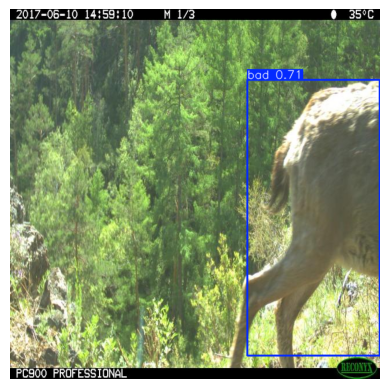

In [5]:
import matplotlib.pyplot as plt
import cv2

image_path = '/kaggle/input/animalsquality/test/images/1324588_jpg.rf.9558b5e6f81305d16e3f7601898d22eb.jpg'  # Укажите путь к вашему изображению
image = cv2.imread(image_path)
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
# Прогоните изображение через модель
results = model(image)

# Визуализируйте результаты
annotated_image = results[0].plot()  # Получите изображение с аннотациями

# Отобразите изображение с предсказанными bounding boxes
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Отключите оси для более чистой визуализации
plt.show()

In [6]:
class_map = {'good': 1, 'bad': 0}

class QualityModel(torch.nn.Module):
    def __init__(self, yolo_model_path, min_size=150):
        super(QualityModel, self).__init__()
        self.yolo = YOLO(yolo_model_path)
        self.min_size = min_size

    def forward(self, image):
        results = self.yolo(image)
        output_dict = {}
        height, width, _ = image.shape
        for result in results:
            for i, box in enumerate(result.boxes):
                class_id = int(box.cls)
                class_name = self.yolo.names[class_id]
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                xc = ((x1 + x2) / 2) / width
                yc = ((y1 + y2) / 2) / height
                w = (x2 - x1) / width
                h = (y2 - y1) / height
                class_id = 0
                if width >= self.min_size and height >= self.min_size:
                    class_id = class_map[class_name]
            
                output_dict[i] = {'bbox': (xc, yc, w, h), 'class': class_id}

        return output_dict

In [7]:
q_model = QualityModel("/kaggle/working/runs/detect/train/weights/best.pt")

print(json.dumps(q_model(image)))


0: 640x640 1 bad, 47.5ms
Speed: 1.6ms preprocess, 47.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
{"0": {"bbox": [0.81953125, 0.56328125, 0.3578125, 0.7453125], "class": 0}}


In [8]:
# image_folder = 'path/to/your/images/'
# output_csv = 'detection_results.csv'

# # Словарь для соответствия меток классов и их значений
# class_map = {'good': 1, 'bad': 0}
# with open(output_csv, mode='w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(['Name', 'Bbox', 'Class'])

#     for image_name in os.listdir(image_folder):
#         image_path = os.path.join(image_folder, image_name)
#         image = cv2.imread(image_path)
        
#         height, width, _ = image.shape

#         results = model(image)
#         for result in results:
#             for box in result.boxes:
#                 class_id = int(box.cls)
#                 class_name = model.names[class_id]

#                 if class_name in class_map:

#                     x1, y1, x2, y2 = box.xyxy[0]
#                     xc = ((x1 + x2) / 2) / width
#                     yc = ((y1 + y2) / 2) / height
#                     w = (x2 - x1) / width
#                     h = (y2 - y1) / height
#                     class_code = 0
#                     if w > 128 && h > 128:
#                         class_code = class_map[class_name]
#                     writer.writerow([os.path.splitext(image_name)[0], f'{xc:.6f},{yc:.6f},{w:.6f},{h:.6f}', class_map[class_name]])